In [1]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Dropout, Reshape, Concatenate, LeakyReLU
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model

In [359]:
a = {r:15}

In [360]:
a[r]

15

In [2]:
image_height, image_width, color_channels = 256, 256, 3

In [3]:
class Classifier:
    def __init__():
        self.model = 0
    
    def predict(self, x):
        return self.model.predict(x)
    
    def fit(self, x, y):
        return self.model.train_on_batch(x, y)
    
    def get_accuracy(self, x, y):
        return self.model.test_on_batch(x, y)
    
    def load(self, path):
        self.model.load_weights(path)

In [9]:
class Meso4(Classifier):
    def __init__(self, learning_rate = 0.001):
        self.model = self.init_model()
        optimizer = Adam(lr = learning_rate)
        self.model.compile(optimizer = optimizer, loss = 'mean_squared_error', metrics = ['accuracy'])
    
    def init_model(self): 
        x = Input(shape = (image_width, image_height, 3))
        
        x1 = Conv2D(8, (3, 3), padding='same', activation = 'relu')(x)
        x1 = BatchNormalization()(x1)
        x1 = MaxPooling2D(pool_size=(2, 2), padding='same')(x1)
        
        x2 = Conv2D(8, (5, 5), padding='same', activation = 'relu')(x1)
        x2 = BatchNormalization()(x2)
        x2 = MaxPooling2D(pool_size=(2, 2), padding='same')(x2)
        
        x3 = Conv2D(16, (5, 5), padding='same', activation = 'relu')(x2)
        x3 = BatchNormalization()(x3)
        x3 = MaxPooling2D(pool_size=(2, 2), padding='same')(x3)
        
        x4 = Conv2D(16, (5, 5), padding='same', activation = 'relu')(x3)
        x4 = BatchNormalization()(x4)
        x4 = MaxPooling2D(pool_size=(4, 4), padding='same')(x4)
        
        y = Flatten()(x4)
        y = Dropout(0.5)(y)
        y = Dense(16)(y)
        y = LeakyReLU(alpha=0.1)(y)
        y = Dropout(0.5)(y)
        y = Dense(1, activation = 'sigmoid')(y)

        return Model(inputs = x, outputs = y)

In [10]:
class MesoInception4(Classifier):
    def __init__(self, learning_rate = 0.001):
        self.model = self.init_model()
        optimizer = Adam(lr = learning_rate)
        self.model.compile(optimizer = optimizer, loss = 'mean_squared_error', metrics = ['accuracy'])
    
    def InceptionLayer(self, a, b, c, d):
        def func(x):
            x1 = Conv2D(a, (1, 1), padding='same', activation='relu')(x)
            
            x2 = Conv2D(b, (1, 1), padding='same', activation='relu')(x)
            x2 = Conv2D(b, (3, 3), padding='same', activation='relu')(x2)
            
            x3 = Conv2D(c, (1, 1), padding='same', activation='relu')(x)
            x3 = Conv2D(c, (3, 3), dilation_rate = 2, strides = 1, padding='same', activation='relu')(x3)
            
            x4 = Conv2D(d, (1, 1), padding='same', activation='relu')(x)
            x4 = Conv2D(d, (3, 3), dilation_rate = 3, strides = 1, padding='same', activation='relu')(x4)

            y = Concatenate(axis = -1)([x1, x2, x3, x4])
            
            return y
        return func
    def init_model(self):
        x = Input(shape = (image_width, image_height, 3))
        
        x1 = self.InceptionLayer(1, 4, 4, 2)(x)
        x1 = BatchNormalization()(x1)
        x1 = MaxPooling2D(pool_size=(2, 2), padding='same')(x1)
        
        x2 = self.InceptionLayer(2, 4, 4, 2)(x1)
        x2 = BatchNormalization()(x2)
        x2 = MaxPooling2D(pool_size=(2, 2), padding='same')(x2)        
        
        x3 = Conv2D(16, (5, 5), padding='same', activation = 'relu')(x2)
        x3 = BatchNormalization()(x3)
        x3 = MaxPooling2D(pool_size=(2, 2), padding='same')(x3)
        
        x4 = Conv2D(16, (5, 5), padding='same', activation = 'relu')(x3)
        x4 = BatchNormalization()(x4)
        x4 = MaxPooling2D(pool_size=(4, 4), padding='same')(x4)
        
        y = Flatten()(x4)
        y = Dropout(0.5)(y)
        y = Dense(16)(y)
        y = LeakyReLU(alpha=0.1)(y)
        y = Dropout(0.5)(y)
        y = Dense(1, activation = 'sigmoid')(y)

        return Model(inputs = x, outputs = y)

In [11]:
meso4 = Meso4()
meso_inception4 = MesoInception4()

In [12]:
os.getcwd()

'/Users/mikhaillenko/deepfake_classification'

In [14]:
meso4.load('./weights/Meso4_DF')
meso_inception4.load('./weights/MesoInception_DF')

In [18]:
dataGenerator = ImageDataGenerator(rescale=1./255)
generator = dataGenerator.flow_from_directory(
        './data/',
        target_size=(256, 256),
        batch_size=1,
        class_mode='binary',
        subset='training')

Found 7104 images belonging to 2 classes.


In [16]:
generator.class_indices

{'.ipynb_checkpoints': 0, 'DeepFake': 1, 'Reals': 2}

In [19]:
generator.class_indices

{'DeepFake': 0, 'Reals': 1}

In [51]:
test_gen = dataGenerator.flow_from_directory(
    './test/',
    target_size=(256,256),
    batch_size=1,
    class_mode='binary',
    subset='training')

Found 5 images belonging to 2 classes.


In [52]:
test_gen.class_indices

{'DeepFake': 0, 'Reals': 1}

In [62]:
from matplotlib.pyplot import imshow

In [66]:
A

array([[[[0.69803923, 0.6627451 , 0.5568628 ],
         [0.7254902 , 0.6901961 , 0.58431375],
         [0.75294125, 0.7137255 , 0.6039216 ],
         ...,
         [0.12156864, 0.12941177, 0.14901961],
         [0.12156864, 0.12941177, 0.14901961],
         [0.12156864, 0.12941177, 0.14901961]],

        [[0.6862745 , 0.6509804 , 0.5529412 ],
         [0.7137255 , 0.6784314 , 0.5803922 ],
         [0.7490196 , 0.70980394, 0.6039216 ],
         ...,
         [0.12156864, 0.12941177, 0.14901961],
         [0.12156864, 0.12941177, 0.14901961],
         [0.12156864, 0.12941177, 0.14901961]],

        [[0.6627451 , 0.6313726 , 0.53333336],
         [0.7019608 , 0.6666667 , 0.57254905],
         [0.73333335, 0.69411767, 0.5921569 ],
         ...,
         [0.11764707, 0.1254902 , 0.14509805],
         [0.11764707, 0.1254902 , 0.14509805],
         [0.11764707, 0.1254902 , 0.14509805]],

        ...,

        [[0.3647059 , 0.30980393, 0.2784314 ],
         [0.35686275, 0.30588236, 0.27058825]

In [278]:
import matplotlib.pyplot as plt

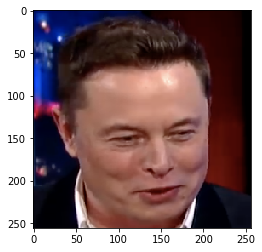

In [75]:
imshow(np.squeeze(A))

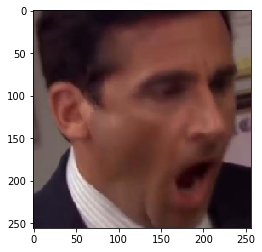

In [302]:
imshow(np.squeeze(X))

In [335]:
A, b = test_gen.next()

print('Meso4_pred:', 
      meso4.predict(A), 
      '\nMesoInception4_pred:',
      meso_inception4.predict(X),
      '\n\nReal class :', b)

Meso4_pred: [[0.99347526]] 
MesoInception4_pred: [[0.5506039]] 

Real class : [0.]


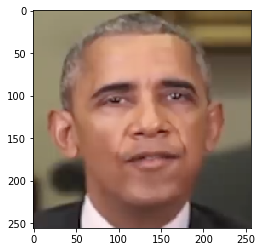

In [336]:
imshow(np.squeeze(A))

In [300]:
imshow(np.squeeze(A))

Meso4_pred: [[0.17691943]] 
MesoInception4_pred: [[0.00518614]] 

Real class : [0.]


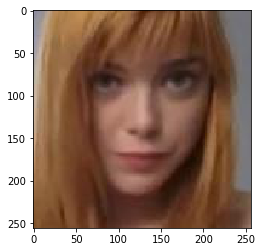

In [353]:
X, y = generator.next()

imshow(np.squeeze(X))

print('Meso4_pred:', 
      meso4.predict(X), 
      '\nMesoInception4_pred:',
      meso_inception4.predict(X),
      '\n\nReal class :', y)

In [219]:
generator.labels

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [223]:
results_df = pd.DataFrame(columns = ['Meso4_pred',
                                     'MesoInception4_pred',
                                     'actual'])

In [225]:
results_df['actual'] = generator.labels

In [228]:
meso4.predict(generator)

array([[0.3273348 ],
       [0.9870543 ],
       [0.97453994],
       ...,
       [0.71829873],
       [0.9941614 ],
       [0.7941194 ]], dtype=float32)

In [231]:
results_df['Meso4_pred'] = meso4.predict(generator)

In [237]:
results_df['MesoInception4_pred'] = meso_inception4.predict(generator)

In [ ]:
pd.options.display.float_format = 
.format

In [250]:
results_df['Meso4'] = round(results_df['Meso4_pred']).astype(int)

In [253]:
results_df['MesoInception4'] = round(results_df['MesoInception4_pred']).astype(int)

In [264]:
def correct_pred(df, column):
    if df[column] == df['actual']:
        return 
    else:
        return 0

In [266]:
results_df['count_Meso'] = 0

In [272]:
results_df['count_Meso'] = results_df['count_Meso'].where(results_df['Meso4'] == results_df['actual'], 1)

In [274]:
results_df.describe()

,Meso4_pred,MesoInception4_pred,actual,Meso4,MesoInception4,count_Meso
count,7104.000000,7104.000000,7104.000000,7104.000000,7104.000000,7104.000000
mean,0.536323,0.565840,0.599521,0.566864,0.566160,0.481137
std,0.355085,0.451146,0.490030,0.495544,0.495638,0.499679
min,0.000071,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.152121,0.005183,0.000000,0.000000,0.000000,0.000000
50%,0.598127,0.807773,1.000000,1.000000,1.000000,0.000000
75%,0.878520,0.999985,1.000000,1.000000,1.000000,1.000000
max,0.999984,1.000000,1.000000,1.000000,1.000000,1.000000


In [214]:
q = meso4.predict(A)[0][0]
r = meso_inception4.predict(A)[0][0]
s = b[0]

row_df = pd.DataFrame([[q,r,s]], columns=['Meso4_pred',
                                                  'MesoInception4_pred',
                                                  'actual'],)

In [215]:
results_df.append(row_df)

,Meso4_pred,MesoInception4_pred,actual
0,0.993475,1.0,0.0


In [216]:
A, b = test_gen.next()

print('Meso4_pred:',
      meso4.predict(A),
      '\nMesoInception4_pred:',
      meso_inception4.predict(A),
      '\n\nReal class:',
      b)

Meso4_pred: [[0.99347526]] 
MesoInception4_pred: [[1.]] 

Real class: [0.]


In [206]:
row_df

,Meso4_pred,MesoInception4_pred,actual
0,0.695085,0.400397,1.0


In [200]:
row_df

,Meso4_pred,MesoInception4_pred,actual
0.695085,NaN,NaN,NaN
0.400397,NaN,NaN,NaN
1.000000,NaN,NaN,NaN


In [157]:
columns = ['Meso4_pred','MesoInception4_pred','actual']
rows = [meso4.predict(A)[0][0], meso_inception4.predict(A), b]

In [159]:
results_df.append(rows)

,Meso4_pred,MesoInception4_pred,actual,0
0,NaN,NaN,NaN,0.695085
1,NaN,NaN,NaN,[[0.40039685]]
2,NaN,NaN,NaN,[1.0]


In [154]:
image_results = pd.Series([meso4.predict(A)[0][0], meso_inception4.predict(A)[0][0], b[0]])

In [156]:
results_df.append(image_results, ignore_index=True)

,Meso4_pred,MesoInception4_pred,actual,0,1,2
0,NaN,NaN,NaN,0.695085,[[0.40039685]],[1.0]


In [160]:
columns = ['i','double','square']
rows = []

for i in range(6):
    row = [i, i*2, i*i]
    rows.append(row)

df = pd.DataFrame(rows, columns=columns)

In [161]:
df.head()

,i,double,square
0,0,0,0
1,1,2,1
2,2,4,4
3,3,6,9
4,4,8,16


In [ ]:
class MesoInception4(Classifier):
    def __init__(self, learning_rate = 0.001):
        self.model = self.init_model()
        optimizer = Adam(lr = learning_rate)
        self.model.compile(optimizer = optimizer, loss = 'mean_squared_error', metrics = ['accuracy'])
    
    def InceptionLayer(self, a, b, c, d):
        def func(x):
            x1 = Conv2D(a, (1, 1), padding='same', activation='relu')(x)
            
            x2 = Conv2D(b, (1, 1), padding='same', activation='relu')(x)
            x2 = Conv2D(b, (3, 3), padding='same', activation='relu')(x2)
            
            x3 = Conv2D(c, (1, 1), padding='same', activation='relu')(x)
            x3 = Conv2D(c, (3, 3), dilation_rate = 2, strides = 1, padding='same', activation='relu')(x3)
            
            x4 = Conv2D(d, (1, 1), padding='same', activation='relu')(x)
            x4 = Conv2D(d, (3, 3), dilation_rate = 3, strides = 1, padding='same', activation='relu')(x4)

            y = Concatenate(axis = -1)([x1, x2, x3, x4])
            
            return y
        return func

In [ ]:
# 1 - Load the model and its pretrained weights
meso4 = tf.keras.Sequential([
    Input(shape=(image_height, image_width, color_channels)),
    Conv2D(8, (3,3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2), padding='same'),
    
    Conv2D(8, (5,5), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2), padding='same'),
    
    Conv2D(16, (5,5), padding=('same'), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2), padding='same'),
    
    Conv2D(16, (5,5), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(4,4), padding='same'),
    
    Flatten(),
    Dropout(0.5),
    Dense(16),
    LeakyReLU(alpha=0.1),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])



meso4.load('weights/Meso4_DF')

In [ ]:
meso4

In [ ]:
meso_model = tf.keras.Sequential([
    Input(shape=(image_width, image_length, color_channels)),
    Conv2D(8, (3,3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2), padding='same'),
    
    Conv2D(8, (5,5), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2), padding='same'),
    
    Conv2D(16, (5,5), padding=('same'), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2), padding='same'),
    
    Conv2D(16, (5,5), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(4,4), padding='same'),
    
    Flatten(),
    Dropout(0.5),
    Dense(16),
    LeakyReLU(alpha=0.1),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

In [ ]:
# -*- coding:utf-8 -*-

from keras.models import Model as KerasModel
from keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Dropout, Reshape, Concatenate, LeakyReLU
from keras.optimizers import Adam

IMGWIDTH = 256

class Classifier:
    def __init__():
        self.model = 0
    
    def predict(self, x):
        return self.model.predict(x)
    
    def fit(self, x, y):
        return self.model.train_on_batch(x, y)
    
    def get_accuracy(self, x, y):
        return self.model.test_on_batch(x, y)
    
    def load(self, path):
        self.model.load_weights(path)

In [ ]:
class MesoInception4(Classifier):
    def __init__(self, learning_rate = 0.001):
        self.model = self.init_model()
        optimizer = Adam(lr = learning_rate)
        self.model.compile(optimizer = optimizer, loss = 'mean_squared_error', metrics = ['accuracy'])
    
    def InceptionLayer(self, a, b, c, d):
        def func(x):
            x1 = Conv2D(a, (1, 1), padding='same', activation='relu')(x)
            
            x2 = Conv2D(b, (1, 1), padding='same', activation='relu')(x)
            x2 = Conv2D(b, (3, 3), padding='same', activation='relu')(x2)
            
            x3 = Conv2D(c, (1, 1), padding='same', activation='relu')(x)
            x3 = Conv2D(c, (3, 3), dilation_rate = 2, strides = 1, padding='same', activation='relu')(x3)
            
            x4 = Conv2D(d, (1, 1), padding='same', activation='relu')(x)
            x4 = Conv2D(d, (3, 3), dilation_rate = 3, strides = 1, padding='same', activation='relu')(x4)

            y = Concatenate(axis = -1)([x1, x2, x3, x4])
            
            return y
        return func
    
    def init_model(self):
        x = Input(shape = (IMGWIDTH, IMGWIDTH, 3))
        
        x1 = self.InceptionLayer(1, 4, 4, 2)(x)
        x1 = BatchNormalization()(x1)
        x1 = MaxPooling2D(pool_size=(2, 2), padding='same')(x1)
        
        x2 = self.InceptionLayer(2, 4, 4, 2)(x1)
        x2 = BatchNormalization()(x2)
        x2 = MaxPooling2D(pool_size=(2, 2), padding='same')(x2)        
        
        x3 = Conv2D(16, (5, 5), padding='same', activation = 'relu')(x2)
        x3 = BatchNormalization()(x3)
        x3 = MaxPooling2D(pool_size=(2, 2), padding='same')(x3)
        
        x4 = Conv2D(16, (5, 5), padding='same', activation = 'relu')(x3)
        x4 = BatchNormalization()(x4)
        x4 = MaxPooling2D(pool_size=(4, 4), padding='same')(x4)
        
        y = Flatten()(x4)
        y = Dropout(0.5)(y)
        y = Dense(16)(y)
        y = LeakyReLU(alpha=0.1)(y)
        y = Dropout(0.5)(y)
        y = Dense(1, activation = 'sigmoid')(y)

        return KerasModel(inputs = x, outputs = y)

In [ ]:
import numpy as np
from classifiers import *
from pipelines import *

from keras.preprocessing.image import ImageDataGenerator

In [ ]:
!pip install -- classifiers

In [ ]:
!pip install -- pipelines